c:\Users\hp\anaconda3\envs\qiskit-stable\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


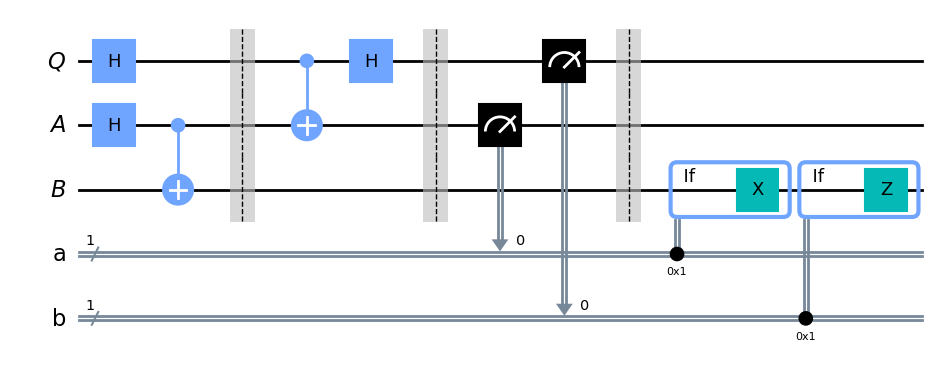

In [1]:
# Implementing plus state and sending it via the Teleportation protocol

# Required imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution

qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Perform H gate to conver 0 state into + state
protocol.h(qubit)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Sender's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# The sender measures and sends classical bits to the receiver
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# The receiver uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw("mpl"))

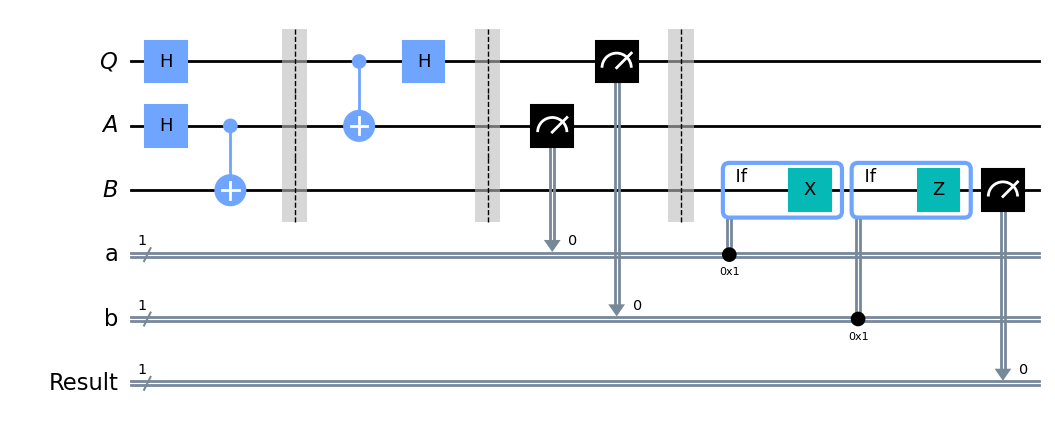

In [2]:

result = ClassicalRegister(1, "Result")

protocol.add_register(result)

protocol.measure(ebit1, result)

display(protocol.draw("mpl"))

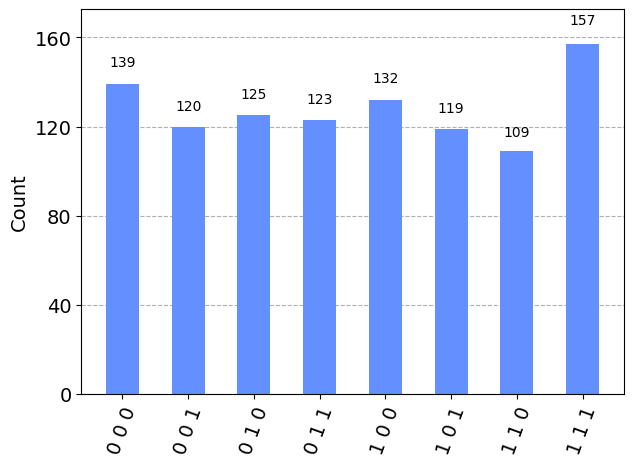

In [3]:

result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

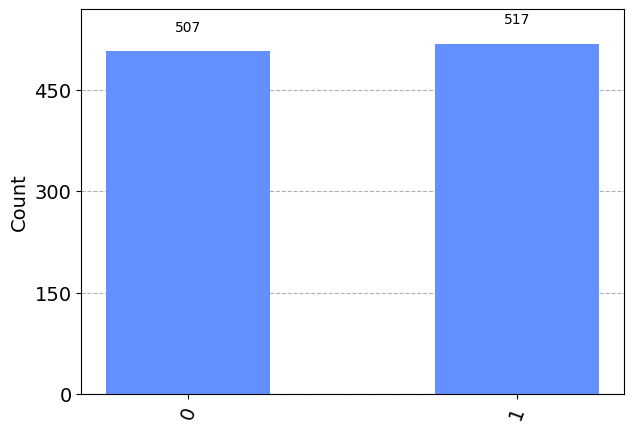

In [4]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))